In [1]:
pip install st-dbscan


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 414 kB 13.9 MB/s 
  Created wheel for st-dbscan: filename=st_dbscan-0.2.0-py2.py3-none-any.whl size=6731 sha256=2da5002ed945064b391083e17cd12c147de560078a0c9f6b20ff9be24d0b7c69
  Stored in directory: /root/.cache/pip/wheels/fb/94/e5/a779f9d17b1a773f9475a140e1a543fb351a1c9d40d174b826
Successfully built st-dbscan


In [2]:
pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 14.6 MB/s 


# New Section

In [39]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from st_dbscan import ST_DBSCAN
from tslearn.generators import random_walks
import tslearn
import numpy
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import numpy
import matplotlib.pyplot as plt
from tslearn.clustering import KernelKMeans

In [28]:
dataframe = pd.read_csv('/content/test-data.csv')
df=dataframe.drop(['id'], axis=1)
df

,t,x,y
0,0,201.623002,186.148565
1,0,247.658670,177.650135
2,0,127.457230,20.572136
3,0,231.180722,172.861323
4,0,217.739518,189.203565
...,...,...,...
20395,50,295.178529,126.033557
20396,50,12.043092,48.362010
20397,50,147.567782,191.984055
20398,50,298.794838,87.621002


In [5]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
neigh.fit(df)
NearestNeighbors(n_neighbors=2)
A = neigh.kneighbors_graph(df)
A.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

ST-DBSCAN

In [7]:
# normalize the data 
df['x'] = (df['x'] - df['x'].min()) / (df['x'].max() - df['x'].min())
df['y'] = (df['y'] - df['y'].min()) / (df['y'].max() - df['y'].min())
# transform to numpy array
data = df.loc[:, ['t','x','y']].values

In [17]:
dta=data[:10000]
len(dta)

10000

In [22]:
st_dbscan = ST_DBSCAN(eps1 = 0.05, eps2 = 10, min_samples = 5) 

In [23]:
st_dbscan.fit(data) 

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:200: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  "Precomputed sparse input was not sorted by data.", EfficiencyWarning


In [20]:
def plot(data, labels):
    colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']
    
    for i in range(-1, len(set(labels))):
        if i == -1:
            col = [0, 0, 0, 1]
        else:
            col = colors[i % len(colors)]
        
        clust = data[np.where(labels==i)]
        plt.scatter(clust[:,0], clust[:,1], c=[col], s=1)
    plt.show()

    return None

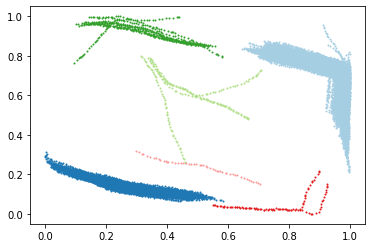

In [24]:
plot(data[:,1:], st_dbscan.labels) 


In [25]:
import plotly.express as px
fig = px.scatter_3d(x=data[:,1], y=data[:,2], z=data[:,0],
              color=st_dbscan.labels)
fig.show()

Time Series K Means

In [29]:
km = TimeSeriesKMeans(n_clusters=19, metric="softdtw", max_iter=3,random_state=0).fit(df)

In [30]:
km.cluster_centers_.shape

(19, 3, 1)

In [31]:
y_pred = km.fit_predict(df)

In [32]:
import plotly.express as px
fig = px.scatter(df, x='x', y='y',color=y_pred)
fig.show()

In [38]:
import plotly.express as px
figkm = px.scatter_3d(x=df['x'], y=df['y'], z=df['t'],color=y_pred)
figkm.show()

In [42]:
dt=df[:5000]

In [43]:
gak_kkm = KernelKMeans(n_clusters=18,
                      kernel="gak",
                      kernel_params={"sigma": "auto"},
                      n_init=2,
                      verbose=True)


In [ ]:
y_predkk = gak_kkm.fit_predict(dt)

In [ ]:
import plotly.express as px
figkm = px.scatter_3d(x=dt['x'], y=dt['y'], z=dt['t'],color=y_predkk)
figkm.show()